# Single image preprocessing and feature extraction - Testfile

This file explores the techniques to be used for preprocessing and feature extraction for the Flavia leaves dataset images.

### Importing necessary libraries

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%cd ~/Dropbox/cstats/project

/Users/zoran/Dropbox/cstats/project


### Reading the image

In [3]:
test_img_path = "20150410_153308_Richtone.jpg"
test_img_path

'./20150410_153308_Richtone.jpg'

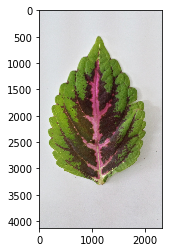

In [4]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Converting image to grayscale

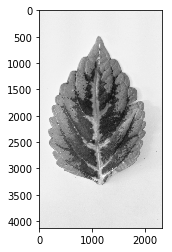

In [5]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [6]:
gs.shape

(4128, 2322)

### Smoothing image using Guassian filter of size (25,25)

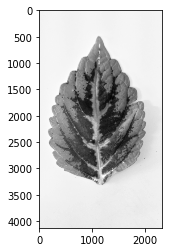

In [7]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

### Adaptive image thresholding using Otsu's thresholding method

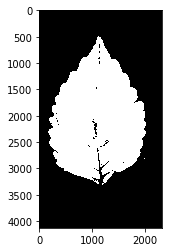

In [8]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

### Closing of holes using Morphological Transformation

Performed so as to close any holes present in the leaf

In [9]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

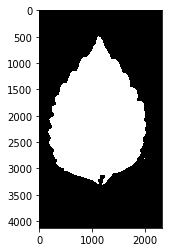

In [10]:
plt.imshow(closing,cmap='Greys_r')

# Boundary extraction

Boundary extraction is needed which will be used in calculation of shape features.

In [11]:
_, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [12]:
len(contours)

2

In [14]:
cnt = contours[1]
len(cnt)

3457

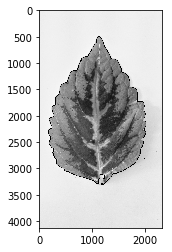

In [15]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

## 1. Shape based features

### Calculating moments using contours

In [16]:
M = cv2.moments(cnt)
M

{'m00': 3351694.0,
 'm10': 3693604269.6666665,
 'm01': 6931340416.0,
 'm20': 4726880063049.333,
 'm11': 7603530253729.583,
 'm02': 15610736923842.332,
 'm30': 6656125794967279.0,
 'm21': 9764645844743760.0,
 'm12': 1.7054542712154158e+16,
 'm03': 3.740257832446655e+16,
 'mu20': 656486852660.8457,
 'mu11': -34884397205.35742,
 'mu02': 1276647963908.918,
 'mu30': 139399127586.0,
 'mu21': 66291369164080.25,
 'mu12': -4381309571139.25,
 'mu03': -160843342983960.0,
 'nu20': 0.05843826441086105,
 'nu11': -0.0031052923899960454,
 'nu02': 0.1136429327900634,
 'nu30': 6.777962332027434e-06,
 'nu21': 0.0032232655319557866,
 'nu12': -0.00021303111254991486,
 'nu03': -0.007820638041153271}

In [17]:
area = cv2.contourArea(cnt)
area

3351694.0

In [18]:
perimeter = cv2.arcLength(cnt,True)
perimeter

8681.95014822483

### Fitting in the best-fit rectangle and ellipse

The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

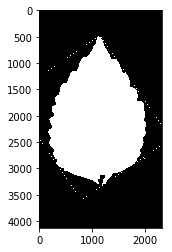

In [19]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

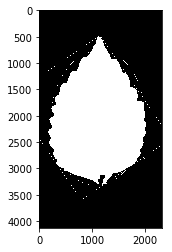

In [20]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

### Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [21]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

0.6582413670345318

In [22]:
rectangularity = w*h/area
rectangularity

1.5496167012859765

In [23]:
circularity = ((perimeter)**2)/area
circularity

22.48900358334059

In [24]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

2065.795087285178

In [25]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
(x,y),(MA,ma),angle

((1104.9395751953125, 2044.3131103515625),
 (1765.99609375, 2553.3876953125),
 3.1913139820098877)

## 2. Color based features

### Calculating color based features - mean, std-dev of the RGB channels

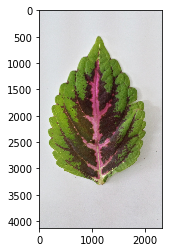

In [26]:
plt.imshow(img,cmap="Greys_r")

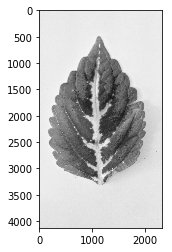

In [27]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

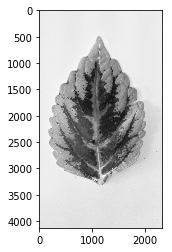

In [28]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

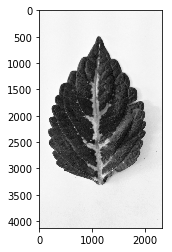

In [29]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [30]:
np.mean(blue_channel)

155.85175920918215

In [31]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [32]:
red_mean = np.mean(red_channel)
red_mean

172.96332539611

In [33]:
green_mean = np.mean(green_channel)
green_mean

171.33054633301953

In [34]:
blue_mean = np.mean(blue_channel)
blue_mean

155.85175920918215

In [35]:
red_var = np.std(red_channel)
red_var

58.48779526441026

## 3. Texture based features 

### Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [36]:
import mahotas as mt

In [37]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 5.05427642e-03,  4.06012484e+01,  9.95090561e-01,  4.13494027e+03,
        5.05280014e-01,  3.37032953e+02,  1.64991598e+04,  7.60640343e+00,
        9.58212255e+00,  9.42695205e-04,  2.50778832e+00, -5.54458488e-01,
        9.99661327e-01])

In [38]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

40.6012483978361
0.9950905610527998
0.5052800138374007
9.582122551370416
